# 비즈니스 프로그래밍 22-2 기말프로젝트 #

In [43]:
#필요한 모듈들과 클래스들
import requests # URL을 통해 데이터를 가져오기 위한 모듈
from bs4 import BeautifulSoup # HTML 데이터를 처리해주는 모듈
import json # 구조화된 데이터 형식 저장을 위한 모듈
from ordered_set import OrderedSet # 목록과 집합의 혼합이며 변경 가능한 데이터 모듈
import re # 정규표현식 사용을 위한 모듈
import ujson # JSON 문자열 구문분석을 위한
import time # 각 url 사이에 delay 를 넣기위한 모듈
import warnings # Jupyternotebook(또는 ipython)에서 경고 메시지를 무시하고 싶을 때 사용하는 모듈
import konlpy #한국어 정보처리를 위한 파이썬 패키지이다
from konlpy.tag import*
import pandas as pd  # Pandas 패키지는 데이터를 다루기 위한 시리즈(Series) 클래스와 데이터프레임(DataFrame) 클래스를 제공.
from wordcloud import WordCloud #파이썬의 워드클라우드 생성기 생성
import matplotlib.pyplot as plt
import matplotlib as mpl
import squarify #트리맵 생성 라이브러리
import matplotlib # 그래프를 그리는 라이브러리
from IPython.display import set_matplotlib_formats
import seaborn as sns #데이터 분포 시각화 라이브러리
from nltk.corpus import stopwords #불용어 처리 라이브러리
from collections import Counter #데이터 갯수를 세는 라이브러리
from kiwipiepy import Kiwi #한국어 형태소 분석기 Kiwi

In [44]:
# 네이버 뉴스 크롤링을 위해 특정 주소값에 변수들을 지정해주는 함수
def crawl_start():
    query = input('검색 키워드를 입력하세요 : ') 
    date_start = input('검색 시작일자를 입력하세요: ')
    date_fin = input('검색 종료일자를 입력하세요: ')
    date_start2 = date_start.replace('.', '')
    date_fin2 = date_fin.replace('.', '')
    start_list1 = [query,date_start,date_fin,date_start2,date_fin2]
    return start_list1

In [45]:
#crawl_start 라는 함수를 통해 크롤링 하려는 특정신도시의 명칭고 입주시작 1년전 ~ 입주시작 전일 까지의 기간을 입력함
wunjung_set = crawl_start() #운정신도시의 입주시작일은 2009.06.09일
pangyo_set = crawl_start() #판교신도시의 입주시작일은 2008.12.31일

검색 키워드를 입력하세요 : 운정신도시
검색 시작일자를 입력하세요: 2008.06.09
검색 종료일자를 입력하세요: 2009.06.09
검색 키워드를 입력하세요 : 판교신도시
검색 시작일자를 입력하세요: 2007.12.31
검색 종료일자를 입력하세요: 2008.12.31


In [46]:
# 뉴스제목을 크롤링 해주는 함수 구현
def data_crawling(L):
    news_url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query={}&sort=0&photo=0&field=0&pd=3&ds={}&de={}&cluster_rank=48&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from{}to{},a:all&start={}1'
    #네이버뉴스를 검색하는 url을 분석하여 어떠한 부분에 검색하고 싶은 키워드와 기간을 넣으면 되는지 알아내었다.
    print("지금부터 크롤링을 시작합니다.")
    print("----------------------")
    page_num = 1
    urls = OrderedSet() #내부 내용이 겹치지 않게 생성되는 OrderedSet()을 urls라는 변수에 할당
    while True: # 무한루프
        if page_num % 2 == 0:
            print("현재 {}페이지를 작업중입니다.".format(page_num) )
            # requests의 get 메소드를 사용하여 웹페이지에 접속하고 그 정보를 req 변수에 할당한다.
        # 웹페이지 접속 정보에서 웹페이지의 소스를 text 변수에 할당한다.
        req = requests.get(news_url.format(L[0], L[1], L[2], L[3], L[4], page_num-1 ))
        html = req.text
        #parsing
        soup = BeautifulSoup(html, 'lxml')
        title_urls = soup.select('a.news_tit') #1페이지당 10개의 뉴스제목이 공통으로 가지고 있는 class이름,  select 함수 사용 title_urls라는 리스트 생성
        urllists = [] #urllist 라는 빈 리스트 생성
        for i in title_urls: #title_urls 리스트 안에 i 즉 뉴스제목이 있는 동안 
            title_url = i.get_text() #title_url은 i에서 추출한 text
            urllists.append(title_url) #urllists 라는 이름의 리스트에 title _url 이라는 변수 추가
            urls.update(urllists) #urls 라는 OrderedSet() 리스트에 urllists라는 리스트 업데이트 
        page_num += 1 #다음페이지로 넘어가기 위함
        time.sleep(0.5) # 0.5초의 delay를 넣는다.
        if len(urls) > 300: #만약 수집한 뉴스제목의 갯수가 300개를 넘어선다면
            print("수집을 종료합니다")
            break # 루프에서 빠져나간다.
    urls = urls[0:300] #수집한 뉴스의 갯수를 300개에 맞추기 위해 리스트 슬라이싱
    print(urls)
    print()
    return urls #함수의 리턴값으로 리스트 안 내용이 겹치지 않게 생성되는 OrderedSet()인 urls를 가짐

In [47]:
wun = data_crawling(wunjung_set) #운정신도시 뉴스제목 크롤링 함수
pan = data_crawling(pangyo_set) #판교신도시 뉴스제목 크롤링 함수

지금부터 크롤링을 시작합니다.
----------------------
현재 2페이지를 작업중입니다.
현재 4페이지를 작업중입니다.
현재 6페이지를 작업중입니다.
현재 8페이지를 작업중입니다.
현재 10페이지를 작업중입니다.
현재 12페이지를 작업중입니다.
현재 14페이지를 작업중입니다.
현재 16페이지를 작업중입니다.
현재 18페이지를 작업중입니다.
현재 20페이지를 작업중입니다.
현재 22페이지를 작업중입니다.
현재 24페이지를 작업중입니다.
현재 26페이지를 작업중입니다.
현재 28페이지를 작업중입니다.
현재 30페이지를 작업중입니다.
현재 32페이지를 작업중입니다.
현재 34페이지를 작업중입니다.
현재 36페이지를 작업중입니다.
현재 38페이지를 작업중입니다.
현재 40페이지를 작업중입니다.
수집을 종료합니다
OrderedSet(['신도시내 軍시설 이전 논란', '동탄2.파주운정3지구 학교용지 무상 공급', "파주, 길은 '뻥' 뚫렸다만", "파주운정 '벽산·우남 연리지' 특별공급", '[2기신도시 기획②]파주교하신도시를 가다', '파주 운정지구 출·퇴근 교통대란 우려', '파주 운정지구 등 입주 후 교통대란 우려', '"운정.세교 택지원가 918억원 부풀려"', '파주 운정신도시 3지구 개발계획 확정', '김포한강·파주운정 등 규제완화 수혜입을 듯', '[미분양 아파트] 파주 교하신도시 삼부르네상스,', '파주 운정3지구 3만2400가구 들어선다', '파주 운정3지구 친환경 자족도시로 개발', '[길따라 물따라] 용인·수원의 부활…파주·일산의 재발견', '“교하신도시를 한국의 베네치아로”', "파주 교하신도시 한국의 '베니스' 된다", '엠코, 경의선 운정·금릉역사 신축공사 수주', '[전문가 추천 미분양 아파트] 파주 운정 ‘운정휴먼시아’', '수도권 북부 신도시 교통대란 오나', '2기 신도시 ‘분양대전’ 개막 ‘발전잠재력’ 따져 청약하세요', '김포-관산 교하신도시 구간 9월 부분개통', '올해 2기신도시에서 4만가구 공급', '파주 운정신도시 

In [49]:
#각 리스트의 내용 확인
print(wun)
print(pan)

OrderedSet(['신도시내 軍시설 이전 논란', '동탄2.파주운정3지구 학교용지 무상 공급', "파주, 길은 '뻥' 뚫렸다만", "파주운정 '벽산·우남 연리지' 특별공급", '[2기신도시 기획②]파주교하신도시를 가다', '파주 운정지구 출·퇴근 교통대란 우려', '파주 운정지구 등 입주 후 교통대란 우려', '"운정.세교 택지원가 918억원 부풀려"', '파주 운정신도시 3지구 개발계획 확정', '김포한강·파주운정 등 규제완화 수혜입을 듯', '[미분양 아파트] 파주 교하신도시 삼부르네상스,', '파주 운정3지구 3만2400가구 들어선다', '파주 운정3지구 친환경 자족도시로 개발', '[길따라 물따라] 용인·수원의 부활…파주·일산의 재발견', '“교하신도시를 한국의 베네치아로”', "파주 교하신도시 한국의 '베니스' 된다", '엠코, 경의선 운정·금릉역사 신축공사 수주', '[전문가 추천 미분양 아파트] 파주 운정 ‘운정휴먼시아’', '수도권 북부 신도시 교통대란 오나', '2기 신도시 ‘분양대전’ 개막 ‘발전잠재력’ 따져 청약하세요', '김포-관산 교하신도시 구간 9월 부분개통', '올해 2기신도시에서 4만가구 공급', '파주 운정신도시 공사현장서 매몰사고 1명 사망', '올해 수도권 신도시에서 3만9천가구 공급', '파주 운정3 설계 공모 최우수작 ‘원양’ 선정', '파주 운정지구 노선버스 확대', '서울-파주 운정지구 노선버스 175대 증차', '판교 신도시 등 전매제한 풀리니 분양권 매물 급증', '파주 교하 신도시 ‘한양 수자인’ 780가구 공급', '파주 교하신도시 ‘한양 수자인’ 780가구 공급', '[화제의 분양단지] ‘코앞’엔 운정역·중심상업지，‘눈앞’엔 호수공원과 골...', '운정·세교 택지원가 918억 과다 산정', '[화제의 분양단지] 인천 청라 ‘한라비발디’－파주 교하 ‘한양수자인’', '공공임대 조기분양전환 수혜단지는?', '수도권 미분양 아파트 3개지구 주목', '파주 교하신도시에 한양수자인 분양', '파주 교하일대 한국 최

In [50]:
#각 리스트의 갯수 확인
print(len(wun)) 
print(len(pan))

300
300


In [51]:
#특정 신도시 관련 뉴스제목들을 dIct 형식과 비슷한 jsonl 형식으로 저장하는 함수 생성
def json(listname):
    name = input('도시 이름을 입력하시오: ') #여기서 임력한 값은 신도시이름.jsonl파일이 된다.
    OUTPUT_FILE = ("C:/Users/grupi/비프 기말 과제/{}.jsonl".format(name)) #
    with open(OUTPUT_FILE, "w", encoding="utf-8") as output_file: # OUTPUT_FILE 이라는 파일이름으로 저장
    # "w"를 써서 파일을 쓰기 전용으로 염
    # encoding="utf-8"을사용해서 파일을 utf-8 인코딩으로 저장
        for idx, url in enumerate(listname): #enumerate 사용으로 리스트의 인덱스 넘버와 리스트 안 내용 동시에 사용가능하게 함
            if idx % 5 == 0:
                print("작업중입니다...{}/{}".format(idx, len(listname)))
            title = listname[idx]
            kkma = Kkma() # 꼬꼬마 형태소 분석기 사용을 위함
            description_ma = kkma.pos(title) #description_ma는 뉴스의 제목인 title을 품사별로 분석한 것
            json_obj = {"title": title,
                       "description_ma": description_ma} #이러한 key와 value를 가지는 딕셔너리 형성
            json_str = ujson.dumps(json_obj, ensure_ascii=False)
            print(json_str, file=output_file, flush=True)
            # json_str형식으로 output_file을␣→flush타입으로 출력
        time.sleep(0.5) # 0.5초의 delay를 넣는다.
    print("작업을 완료했습니다.")
    return OUTPUT_FILE #한수의 리턴 값으로 새로이 저장되는 jsonl 파일을 가짐

In [52]:
W = json(wun) #운정신도시의 뉴스제목들을 제목과(title) 품사별 형태소 분석(description_ma) 으로 나누어 dict 와 비슷한 jsonl 파일로 저장하는 함수 실행
P = json(pan) #판교신도시의 뉴스제목들을 제목과(title) 품사별 형태소 분석(description_ma) 으로 나누어 dict 와 비슷한 jsonl 파일로 저장하는 함수 실행

도시 이름을 입력하시오: 운정신도시
작업중입니다...0/300
작업중입니다...5/300
작업중입니다...10/300
작업중입니다...15/300
작업중입니다...20/300
작업중입니다...25/300
작업중입니다...30/300
작업중입니다...35/300
작업중입니다...40/300
작업중입니다...45/300
작업중입니다...50/300
작업중입니다...55/300
작업중입니다...60/300
작업중입니다...65/300
작업중입니다...70/300
작업중입니다...75/300
작업중입니다...80/300
작업중입니다...85/300
작업중입니다...90/300
작업중입니다...95/300
작업중입니다...100/300
작업중입니다...105/300
작업중입니다...110/300
작업중입니다...115/300
작업중입니다...120/300
작업중입니다...125/300
작업중입니다...130/300
작업중입니다...135/300
작업중입니다...140/300
작업중입니다...145/300
작업중입니다...150/300
작업중입니다...155/300
작업중입니다...160/300
작업중입니다...165/300
작업중입니다...170/300
작업중입니다...175/300
작업중입니다...180/300
작업중입니다...185/300
작업중입니다...190/300
작업중입니다...195/300
작업중입니다...200/300
작업중입니다...205/300
작업중입니다...210/300
작업중입니다...215/300
작업중입니다...220/300
작업중입니다...225/300
작업중입니다...230/300
작업중입니다...235/300
작업중입니다...240/300
작업중입니다...245/300
작업중입니다...250/300
작업중입니다...255/300
작업중입니다...260/300
작업중입니다...265/300
작업중입니다...270/300
작업중입니다...275/300
작업중입니다...280/300
작업중입니다...285/300
작업중입니다...290/300

In [53]:
CHK_POS = {"NNG", "NNP","VA", "XR"} #형태소 분석된 여러 품사들 중 기재된 4가지만 사용함
def morp(city): #뉴스제목과 2글자 이상의 원하는 품사만 리스트로 가지는 dict를 만드는 함수 생성
    title = [] # 뉴스제목
    description_ma = [] # 분석된 형태소들의 리스트를 담는 리스트


    # 저장한 json 파일 불러오기
    with open(city, 'r', encoding='utf-8') as input_file:
        for line in input_file:
            json_data = ujson.loads(line)
            # print(data)
            title.append(json_data['title']) # 제목
            # print(title)           

            tmp_morph = []
            for sent_ma in json_data['description_ma']:

                if sent_ma[1] in CHK_POS and len(sent_ma[0]) > 1:# 수집대상 품사에 해당 하는 않는 keyword 대상제외&1글자인 형태소 제외
                    tmp_morph.append(sent_ma[0])
            description_ma.append(tmp_morph)
    # 위의 빈 description_ma 리스트에 tmp_morph의 내용을 추가합니다.
    news = {
            "title" : title,
            "description_ma" : description_ma
    }  #  title 과 description_ma라는 키값을 가지는 news라는 딕셔너리 형성   
    # print(type(reviews)) 
    # titles = reviews["title"]
    # print(type(titles)) 
    # print(*titles)
    print(news) #
    print()
    print()
    return news #함수의 리턴값을 title 과 description_ma라는 키값을 가지는 news라는 딕셔너리로 한다.

In [54]:
morpW = morp(W) # title(운정 신도시 뉴스제목) 과 description_ma(형태소 분석 값)라는 키값을 가지는 함수 실행
morpP = morp(P) # title(판교 신도시 뉴스제목) 과 description_ma(형태소 분석 값)라는 키값을 가지는 함수 실행

{'title': ['신도시내 軍시설 이전 논란', '동탄2.파주운정3지구 학교용지 무상 공급', "파주, 길은 '뻥' 뚫렸다만", "파주운정 '벽산·우남 연리지' 특별공급", '[2기신도시 기획②]파주교하신도시를 가다', '파주 운정지구 출·퇴근 교통대란 우려', '파주 운정지구 등 입주 후 교통대란 우려', '"운정.세교 택지원가 918억원 부풀려"', '파주 운정신도시 3지구 개발계획 확정', '김포한강·파주운정 등 규제완화 수혜입을 듯', '[미분양 아파트] 파주 교하신도시 삼부르네상스,', '파주 운정3지구 3만2400가구 들어선다', '파주 운정3지구 친환경 자족도시로 개발', '[길따라 물따라] 용인·수원의 부활…파주·일산의 재발견', '“교하신도시를 한국의 베네치아로”', "파주 교하신도시 한국의 '베니스' 된다", '엠코, 경의선 운정·금릉역사 신축공사 수주', '[전문가 추천 미분양 아파트] 파주 운정 ‘운정휴먼시아’', '수도권 북부 신도시 교통대란 오나', '2기 신도시 ‘분양대전’ 개막 ‘발전잠재력’ 따져 청약하세요', '김포-관산 교하신도시 구간 9월 부분개통', '올해 2기신도시에서 4만가구 공급', '파주 운정신도시 공사현장서 매몰사고 1명 사망', '올해 수도권 신도시에서 3만9천가구 공급', '파주 운정3 설계 공모 최우수작 ‘원양’ 선정', '파주 운정지구 노선버스 확대', '서울-파주 운정지구 노선버스 175대 증차', '판교 신도시 등 전매제한 풀리니 분양권 매물 급증', '파주 교하 신도시 ‘한양 수자인’ 780가구 공급', '파주 교하신도시 ‘한양 수자인’ 780가구 공급', '[화제의 분양단지] ‘코앞’엔 운정역·중심상업지，‘눈앞’엔 호수공원과 골...', '운정·세교 택지원가 918억 과다 산정', '[화제의 분양단지] 인천 청라 ‘한라비발디’－파주 교하 ‘한양수자인’', '공공임대 조기분양전환 수혜단지는?', '수도권 미분양 아파트 3개지구 주목', '파주 교하신도시에 한양수자인 분양', '파주 교하일대 한국 최대

In [55]:
def makelist(A): #형태소의 빈도수를 알려주는 함수 생성
    empty = [] #빈 리스트 생성, 추후 이곳에 뉴스제목으로 부터 얻어 분석한 형태소들을 추가할 예정
    stopwords = ['판교', '파주','도시','지구'] # 불용어 처리를 위해 당연하게 큰 빈도수를 가지거나 이상한 형태소 제거 
    for i in A["description_ma"]:# "딕셔너리에서 특정신도시["description_ma"] 라는 이중 리스트 안에서
        for j in i: #이중 리스트 안 요소들 중에서
            if j not in stopwords: #만약 형태소들 중에 불용어가 없다면
                empty.append(j) #empty라는 빈 리스트에 형태소드를 더한다.
    empty = empty[:1000] #empty안에 형태소 값은 1000개로 한다.
    print("단어 개수 :",len(empty))
    count = Counter(empty) #빈도수 측정
    words = dict(count.most_common(40)) # 가장 빈도수가 많은 40개의 형태소 들을 dict형대로 words에 저장함
    print(words)
    return words #함수의 리턴값으로 가장 빈도수가 많은 40개의 형태소들로 구성된 dict를 받는다.

In [56]:
Wunjung = makelist(morpW) #운정신도시 관련 뉴스에서 추출된 형태소의 빈도수를 알려주는 함수 실행
Pangyo = makelist(morpP) #판교신도시 관련 뉴스에서 추출된 형태소의 빈도수를 알려주는 함수 실행

단어 개수 : 1000
{'신도시': 50, '분양': 47, '가구': 21, '전매': 19, '미분양': 18, '단지': 18, '수도권': 17, '부동산': 16, '공급': 15, '제한': 15, '아파트': 14, '완화': 12, '임대': 11, '시장': 11, '택지': 10, '주택': 10, '공공': 9, '복합': 9, '마련': 9, '개발': 8, '수혜': 8, '청약': 8, '분양권': 8, '내년': 8, '경기': 8, '공사': 7, '건설': 7, '용지': 6, '전철': 6, '관심': 6, '개통': 5, '서울': 5, '한양': 5, '수자': 5, '양수': 5, '자인': 5, '보상': 5, '상가': 5, '상업': 5, '주공': 5}
단어 개수 : 1000
{'신도시': 84, '분양': 48, '입주': 40, '가구': 29, '내년': 28, '상가': 24, '분당': 16, '시장': 15, '전매': 15, '단지': 15, '아파트': 14, '부동산': 13, '개통': 12, '도로': 11, '청약': 10, '대형': 9, '공급': 9, '공사': 9, '새해': 8, '완화': 8, '제한': 8, '수도권': 7, '알짜': 7, '연기': 7, '로또': 7, '주공': 7, '주택': 6, '집값': 6, '임대': 5, '규제': 5, '마지막': 5, '경기': 5, '시설': 5, '유찰': 5, '지하': 5, '차도': 5, '부영': 4, '내달': 4, '마련': 4, '하락': 4}


In [57]:
def word_cloud(B): #워드 클라우드 생성 함수 생성
    city = input("도시를 입력하세요: ") #워르클라우드 이름 입력
    matplotlib.rc('font',family = 'Malgun Gothic') # 폰트 설정
    set_matplotlib_formats('retina') 
    plt.title(city, fontsize=20) #제목과 제목 폰트크기 설정
    wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r",
                          width=3000, height=2000).generate_from_frequencies(B) #워드 클라우드 전체 크기 설정

    plt.imshow(wordcloud)
    plt.axis('off') #x,y 축 삭제
    plt.gcf().set_size_inches(10, 10)  #워드 클라우드 전체 크기 설정
    plt.show() #워드 클라우드 시각화

도시를 입력하세요: 운정신도시


C:\Users\grupi\AppData\Local\Temp\ipykernel_43844\2741243956.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


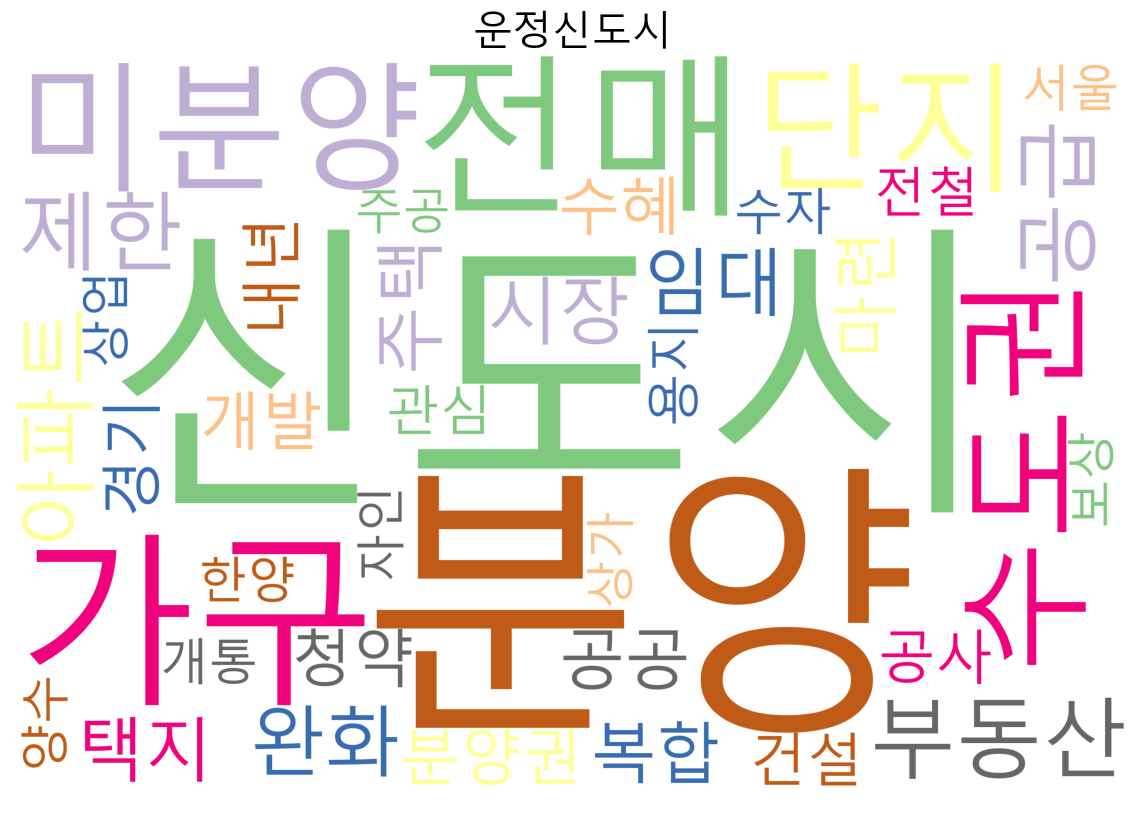

도시를 입력하세요: 판교신도시


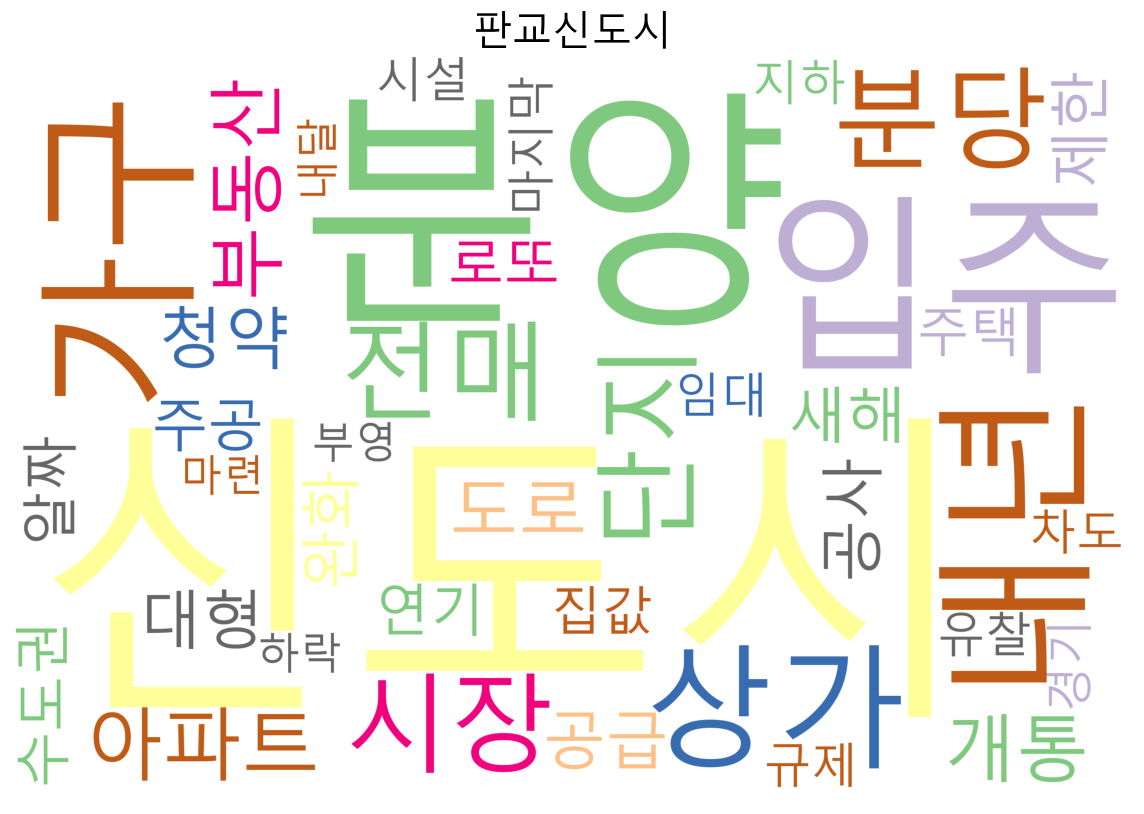

In [58]:
W_cloud = word_cloud(Wunjung) #운정신도시 워드클라우드 함수 실행
P_cloud = word_cloud(Pangyo) #판교신도시 워드클라우드 함수 실행

In [59]:
def make_square(C): #트리맵 생성 함수 선언
    city = input("도시를 입력하세요: ") #트리맵 이름 입력
    norm = mpl.colors.Normalize(vmin=min(C.values()),vmax=max(C.values()))
    colors = sns.color_palette("pastel") #색상설정
    squarify.plot(label=C.keys(),sizes=C.values(),color=colors,alpha=0.8, text_kwargs={'fontsize': 20})
    plt.axis('off') #x,y 축 삭제
    plt.title(city, fontsize= 18) #트리맵 이름과 폰트 크기 설정
    plt.gcf().set_size_inches(16, 10) #트리맵 전체 크기 설정
    plt.show() #트리맵 실행

도시를 입력하세요: 운정신도시


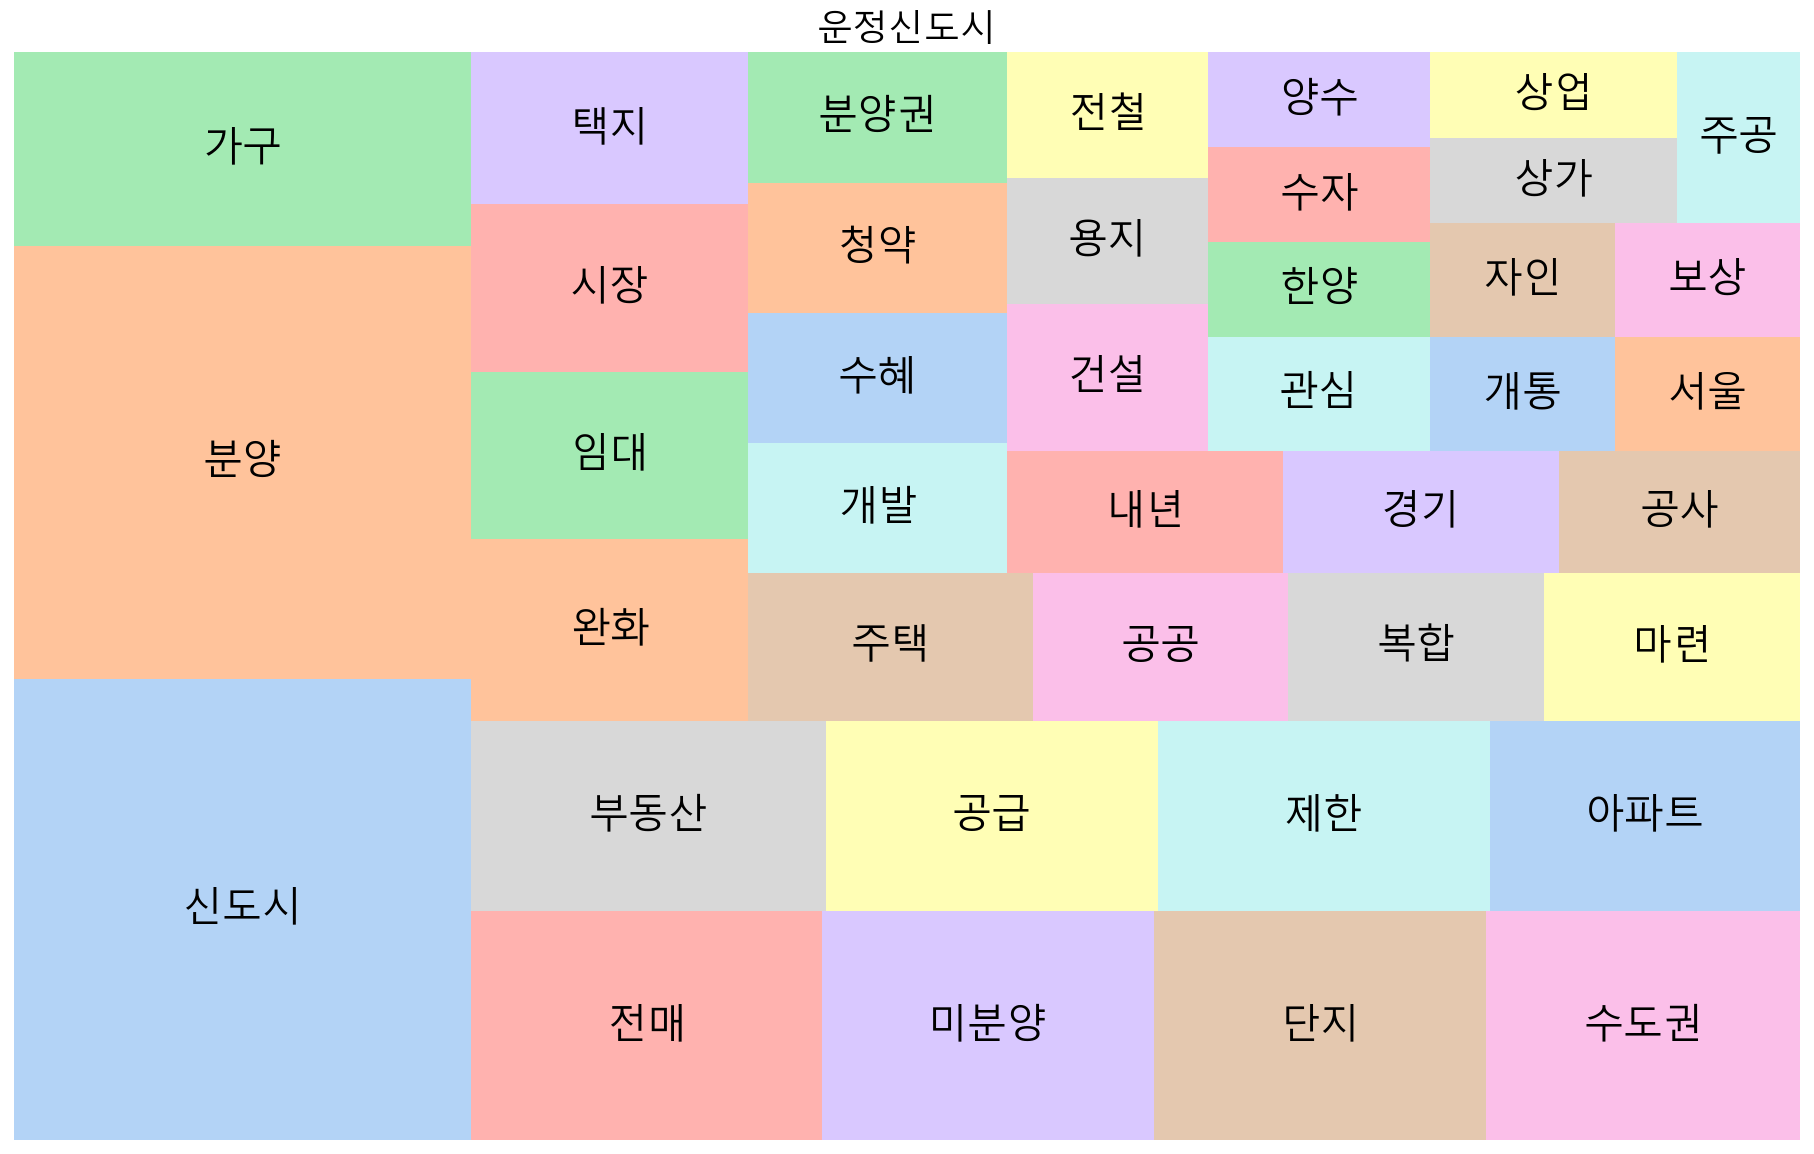

도시를 입력하세요: 판교신도시


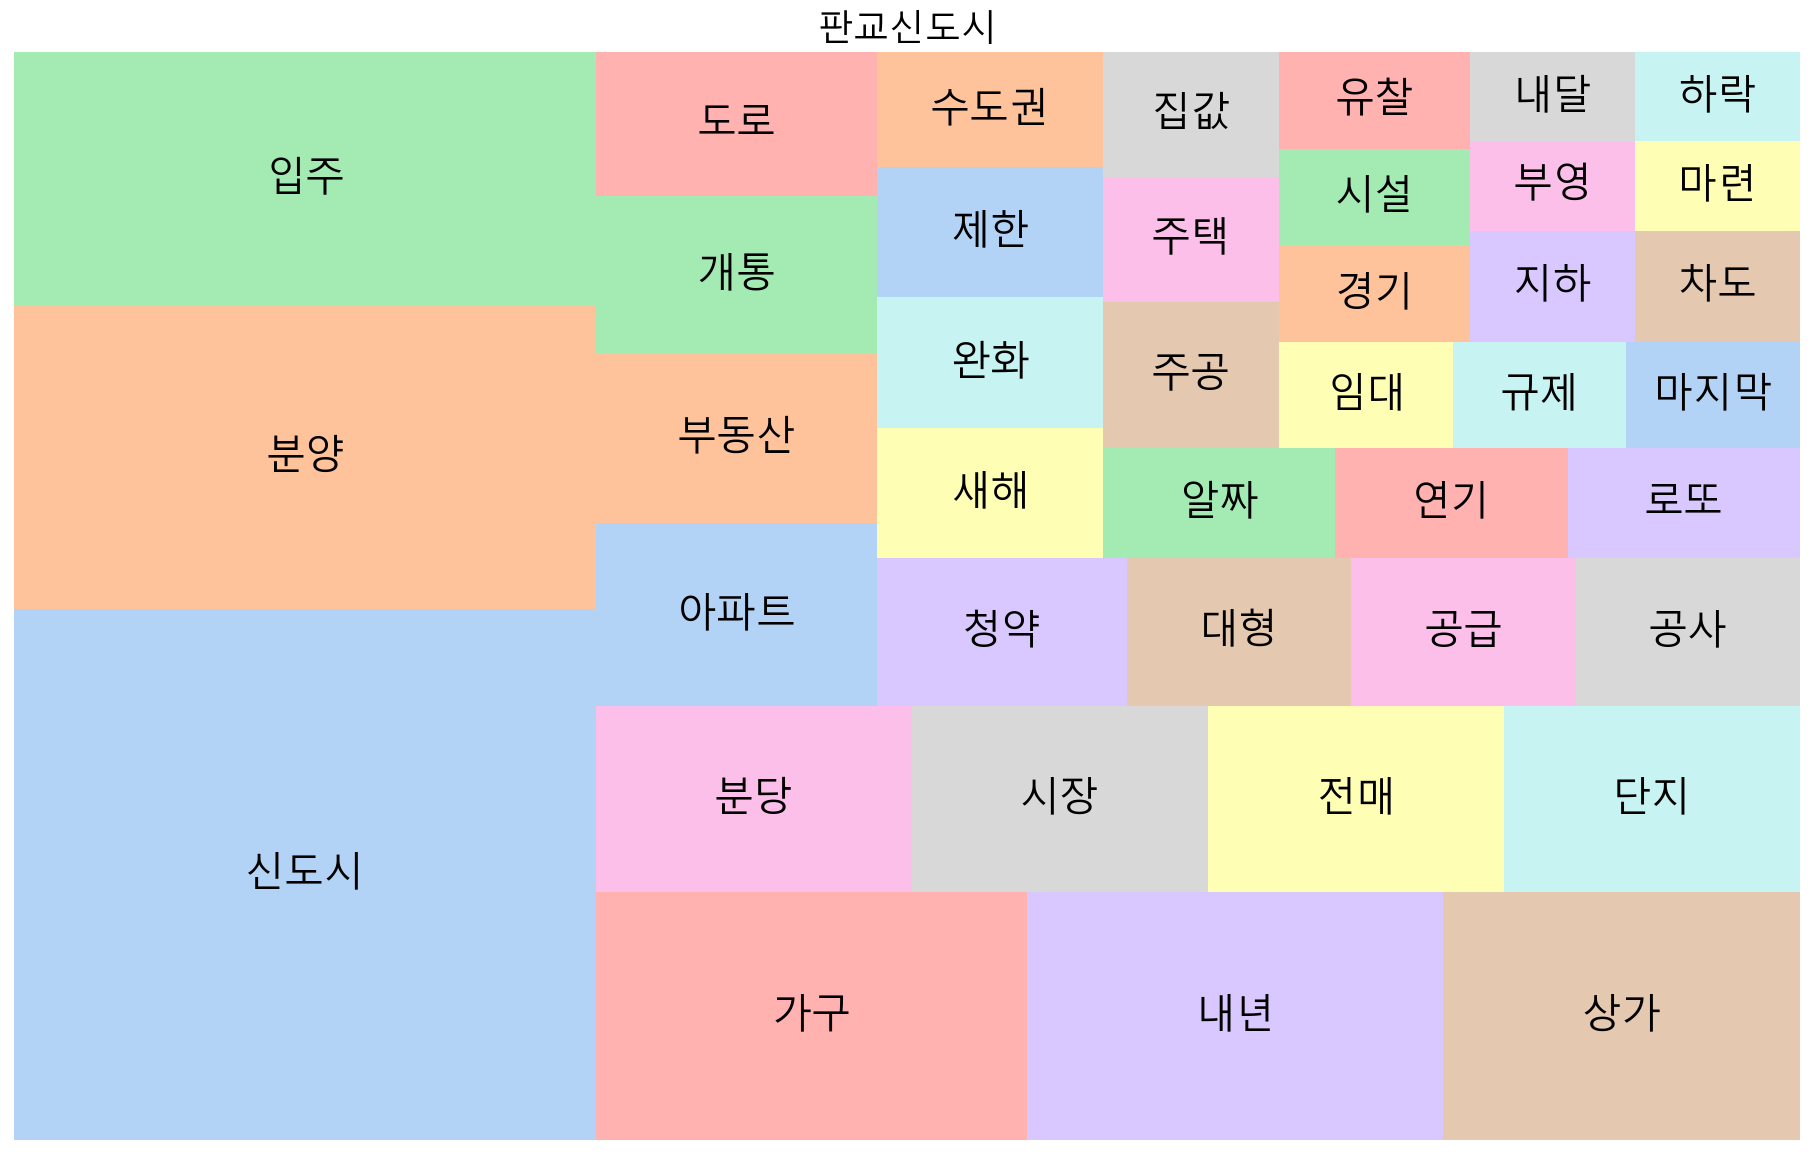

In [60]:
W_square = make_square(Wunjung) #운정신도시 트리맵 함수 실행
P_square = make_square(Pangyo) #판교신도시 트리맵 함수 실행